# K-means (MNIST) train/test

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import numpy as np
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
n_samples,n_features=X_train.shape
n_digits=len(np.unique(y_train))
labels=y_train

### PCA

In [43]:
from sklearn.decomposition import PCA

In [45]:
pca= PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### K-means

In [48]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=10)
clf.fit(X_train_pca,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### predict

In [49]:
y_pred = clf.predict(X_test_pca)

In [57]:
##test
#predict
pred = pd.DataFrame(y_pred)
pred.columns=['pred']
feature = pd.DataFrame(X_test_pca)
p = pd.concat([feature,pred],axis=1)
p.columns=['f1','f2','pred']
print(p)

#real
real = pd.DataFrame(y_test)
real.columns=['real']
r = pd.concat([feature, real], axis=1)
r.columns=['f1','f2','real']
print(r)

            f1         f2  pred
0    23.674424   1.306149     7
1   -19.290516   0.113221     9
2    19.483879   5.250924     7
3    25.197829  -1.457956     7
4   -15.787725 -14.702309     4
..         ...        ...   ...
445   4.003244  -1.689400     8
446  12.907869  -7.415581     3
447 -10.432270  18.816608     0
448  -5.584276 -18.160974     4
449 -17.076082  15.055161     0

[450 rows x 3 columns]
            f1         f2  real
0    23.674424   1.306149     3
1   -19.290516   0.113221     6
2    19.483879   5.250924     3
3    25.197829  -1.457956     3
4   -15.787725 -14.702309     1
..         ...        ...   ...
445   4.003244  -1.689400     1
446  12.907869  -7.415581     2
447 -10.432270  18.816608     6
448  -5.584276 -18.160974     7
449 -17.076082  15.055161     6

[450 rows x 3 columns]


In [58]:
ct = pd.crosstab(r['real'],p['pred'])
print(ct)

pred   0   1   2   3   4   5   6   7   8   9
real                                        
0      6   0   2   0   0  47   0   0   0   0
1      0  10   1   0  23   0   0   0   5   2
2      0   3   1  29   1   0   1   0  10   0
3      0   0   6  13   0   0   3  20   3   0
4      9   0   0   0   3   0   1   0   0  36
5      2  13   8   0   0   0   9   1   9   1
6     33   0   0   0   0   0   0   0   0   5
7      0  10   0   0   5   0  32   0   0   0
8      0  13   2   1   0   0   7   0  12   0
9      0   5  21   2   0   0   3  15   6   0


###  무게중심 계산

In [59]:
centers = pd.DataFrame(clf.cluster_centers_,columns=['f1','f2'])
center_x = centers['f1']
center_y = centers['f2']

### visualizaton (test data)

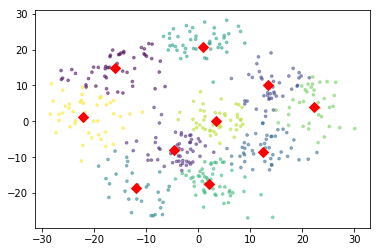

In [64]:
# scatter plot
plt.scatter(p['f1'],p['f2'], s=7, c=p['pred'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='R')
plt.show()

### cluster 개수

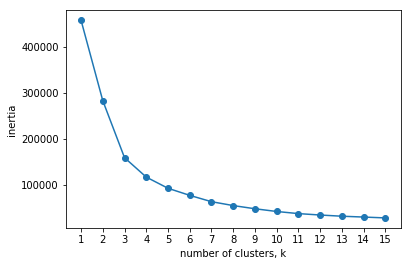

In [65]:
ks = range(1,16)
inertias = []

for k in ks:
    clf = KMeans(n_clusters=k,init='k-means++')
    clf.fit(X_train_pca,y_train)
    inertias.append(clf.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()